In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [148]:
df = pd.read_csv('weight-height.csv')

In [149]:
df.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [150]:
df.drop('Gender',axis=1,inplace=True)

In [151]:
df.head(2)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473


In [152]:
## Scatter Plot

plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Height')
plt.ylabel('Weight')

Text(0, 0.5, 'Weight')

In [153]:
## Correlation 
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [154]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [155]:
## Independent and Dependent Features
x = df[['Weight']] ## Always make sure that you independent feature is in the form of dataframe or 2d array
y = df['Height'] ## This variable can be in series or 1d array

In [156]:
x_series = df['Weight']
np.array(x_series).shape

(10000,)

In [157]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [158]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [159]:
X_test = scaler.transform(X_test)

In [160]:
## Apply Simple linear regression

from sklearn.linear_model import LinearRegression

In [161]:
regression = LinearRegression(n_jobs=-1)

In [162]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [163]:
print('Coefficient or slope',regression.coef_)
print('Intercept',regression.intercept_)

Coefficient or slope [3.5520765]
Intercept 66.34834766153067


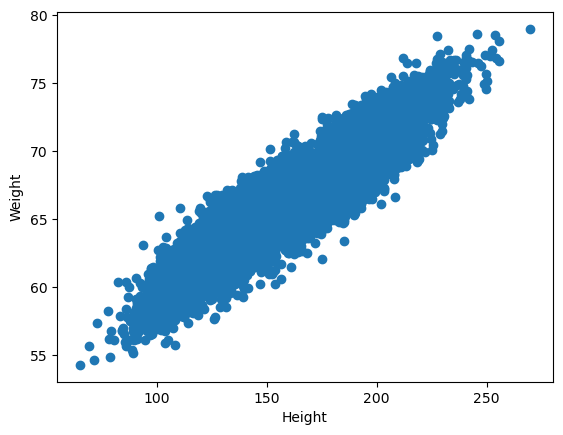

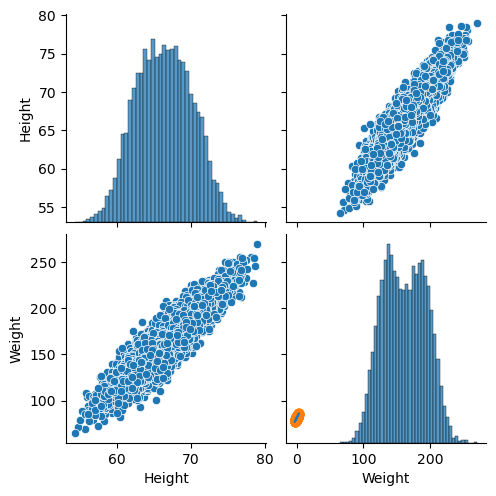

In [164]:
## Plot Best fit line
plt.scatter( X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [165]:
## Prediction for test data 
y_pred = regression.predict(X_test)

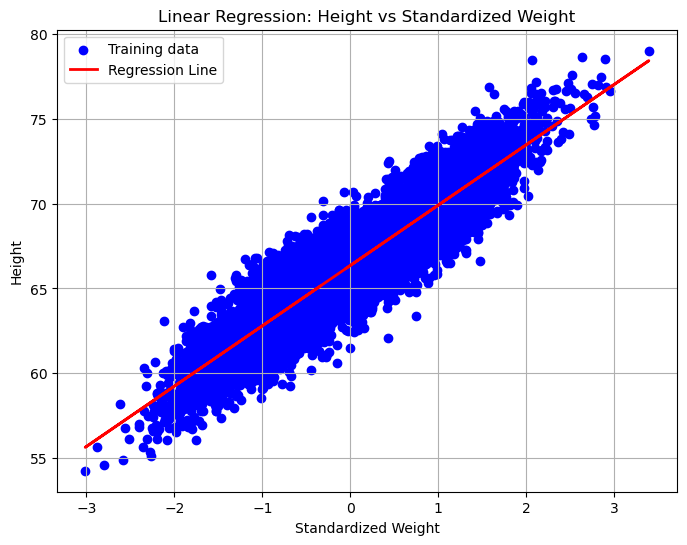


Interpretation:
- The intercept (66.348) means the expected height when standardized weight is 0.
- The coefficient (3.552) means the change in height (in inches) for each 1 standard deviation increase in weight.


In [166]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, regression.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Standardized Weight')
plt.ylabel('Height')
plt.title('Linear Regression: Height vs Standardized Weight')
plt.legend()
plt.grid(True)
plt.show()

# 8. Interpretation
print("\nInterpretation:")
print(f"- The intercept ({regression.intercept_:.3f}) means the expected height when standardized weight is 0.")
print(f"- The coefficient ({regression.coef_[0]:.3f}) means the change in height (in inches) for each 1 standard deviation increase in weight.")


In [167]:
## Performance Metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [168]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

2.124500293607796
1.1618686242313918
1.4575665657553332


In [169]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score)

0.8574288810712687


In [170]:
## OLS Linear Regression
import statsmodels.api as sm    

In [171]:
model = sm.OLS(X_train,y_train).fit()

In [172]:
prediction = model.predict(X_test)

In [173]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Mon, 28 Apr 2025   Prob (F-statistic):                    3.63e-06
Time:                        16:01:38   Log-Likelihood:                         -10631.
No. Observations:                7500   AIC:                                  2.126e+04
Df Residuals:                    7499   BIC:                                  2.127e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [174]:
## Predict for new data
import warnings
warnings.filterwarnings("ignore")
regression.predict(scaler.transform([[72]]))

array([56.45016021])